# Building a model to predict whether a person would buy the investment scheme based on different characteristics

# Libraries

In [88]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [42]:
df = pd.read_csv(r"C:\Users\Harsh\Downloads\harsh patel - bank.csv")

In [43]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [44]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA

<Axes: xlabel='default', ylabel='count'>

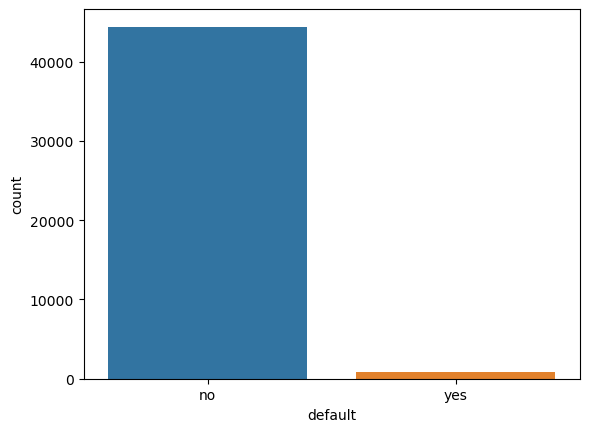

In [45]:
# Here we can see whoever has taken the investment scheme, how many people have defaulted the payment.
#Majority haven't missed any payment.
sns.countplot(x = "default", data = df)

<Axes: xlabel='loan', ylabel='count'>

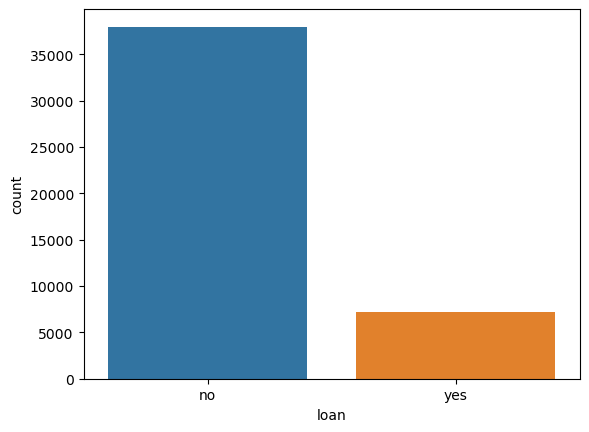

In [46]:
#This graph represents whether the person who has bought the scheme, has any ongoing loan or not.

sns.countplot(x = "loan", data = df)

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

<Axes: xlabel='job', ylabel='count'>

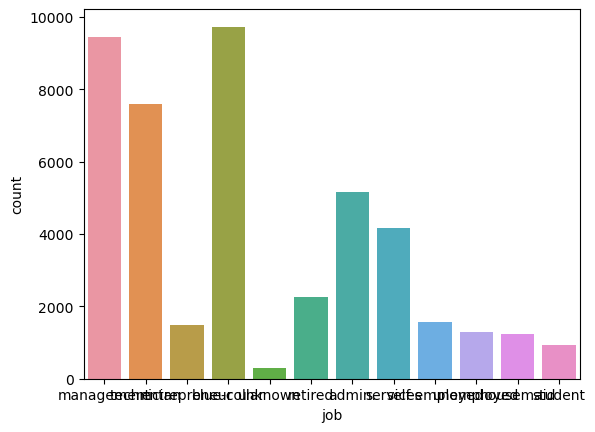

In [48]:
#Here, we can figure that people with management jobs have bought the scheme in highest numbers.-
sns.countplot(x = "job", data = df )

C:\Users\Harsh\AppData\Local\Temp\ipykernel_13256\765695411.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

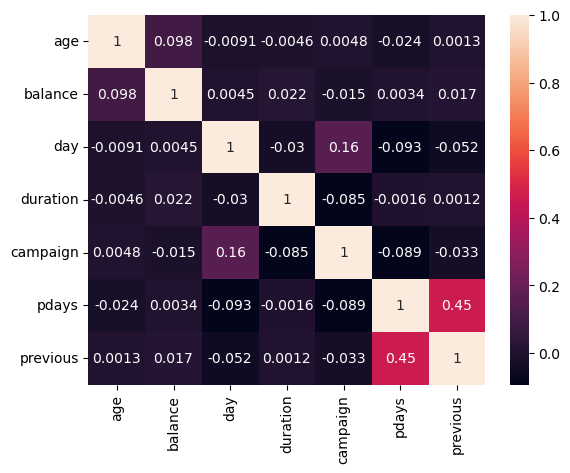

In [49]:
#here, we can interpret that correlation between each other is almost negligible. 
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='loan', ylabel='job'>

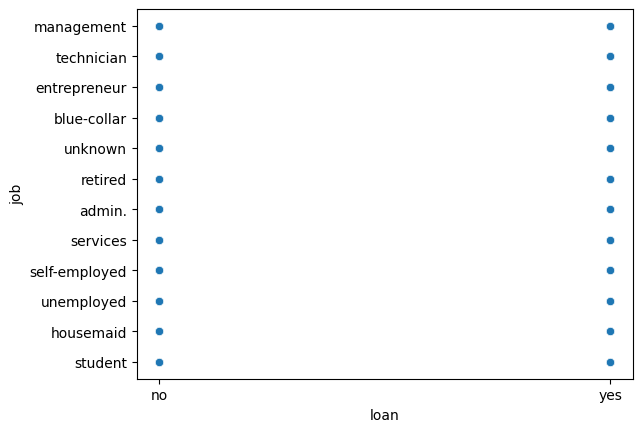

In [50]:
sns.scatterplot(x = 'loan',y = 'job', data = df)

In [103]:
#this is to convert the categorical data into numerical data 
# which will be needed in our model building and analysis
one_encoded = pd.get_dummies(df['loan'], prefix='Loan')

In [52]:
one_encoded

,Loan_no,Loan_yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,1,0


In [1]:
#Joined the dummies column in the original dataset using concat. 
pd.concat([df, one_encoded], axis = 1)

NameError: name 'pd' is not defined

In [54]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [55]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [57]:
print(np.unique(df["job"]))

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [61]:
df["job"].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [63]:
df["subscribed"].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

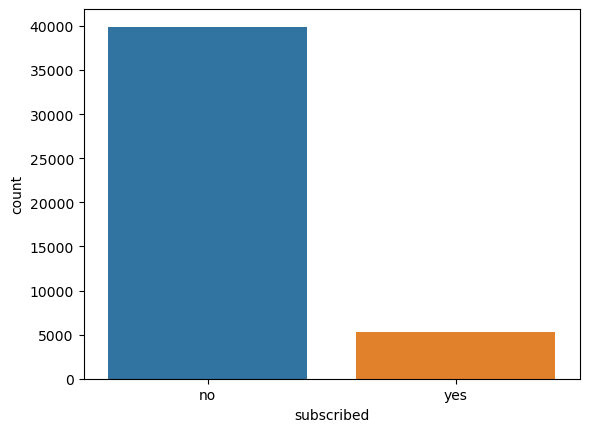

In [65]:
sns.countplot(x = "subscribed", data =df)

In [104]:
#to check correlation between subscribed and job role
job_stats = pd.crosstab(index=df["subscribed"],
                    columns = df["job"],
                    normalize = True)


In [69]:
job_stats

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
subscribed,,,,,,,,,,,,
no,0.100418,0.199597,0.030170,0.025016,0.180421,0.038663,0.030789,0.083719,0.014797,0.149455,0.024352,0.005618
yes,0.013957,0.015660,0.002721,0.002411,0.028776,0.011413,0.004136,0.008162,0.005950,0.018580,0.004468,0.000752


<Axes: ylabel='subscribed'>

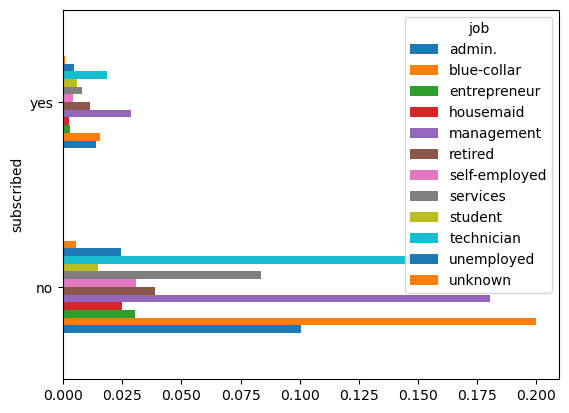

In [73]:
job_stats.plot.barh()

In [76]:
df["balance"].value_counts()

 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

In [79]:
df["poutcome"].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

# Model building


In [82]:
df1 = pd.get_dummies(df, drop_first=True)

In [83]:
df1.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [84]:
df1.tail()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,subscribed_yes
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
45210,37,2971,17,361,2,188,11,0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [87]:
df1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'subscribed_yes'],
      dtype='object')

In [89]:
X = df1.drop(["subscribed_yes"], axis = 1)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [91]:
y = df1["subscribed_yes"]

y.head()

0    0
1    0
2    0
3    0
4    0
Name: subscribed_yes, dtype: uint8

In [92]:
LR = LogisticRegression()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [94]:
LR = LR.fit(X_train, y_train)

C:\Users\Harsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
y_pred = LR.predict(X_test)

In [96]:
accuracy_score(y_test, y_pred)

0.8905190209377765

In [97]:
#making predictions on the trained data. 
y_train_pred = LR.predict(X_train)


In [100]:
#Predicting accuracy of the model built
Accuracy1 = accuracy_score(y_train, y_train_pred)
print("Accuracy of the trained data is : ", Accuracy1)

Accuracy of the trained data is :  0.89190128606187


In [101]:
#Creating a confusion matrix

confusion_matrix(y_test, y_pred)

array([[11733,   233],
       [ 1252,   346]], dtype=int64)

<Axes: >

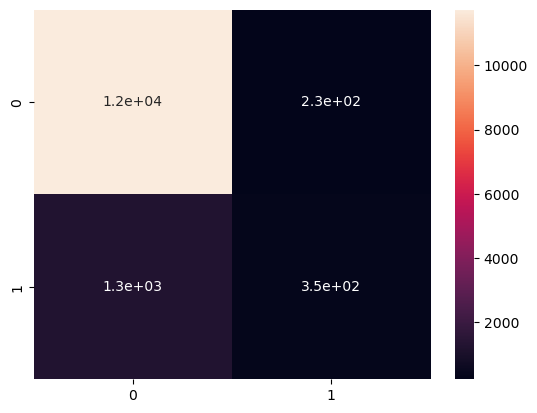

In [102]:
#Creating a heatmap of confusion matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)